In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso


%matplotlib inline

pd.set_option('display.max_columns', None)  # This will display all columns


In [169]:
dfc = pd.read_csv('calendar.csv')
dfl = pd.read_csv('listings.csv')
dfr = pd.read_csv('reviews.csv')

# Airbnb Listings Data in Seattle

The following datasets focus on Airbnb listings data in Seattle:

1. **`dfc`**: Calendars Data
   - Lists each listing's daily availability and price between January 2016 and January 2017.


2. **`dfl`**: Detailed Listing Information
   - Includes data on prices, fees, location, amenities, and reviews for each listing.


3. **`dfr`**: Reviews Data
   - Contains detailed information about the reviews given to the listings, including ratings and text reviews.


# Target Research Questions

The following are the three target research questions:

1. What months witnessed the peak of the average listing nightly price in Seattle?
2. What are the top 3 listing neighbourhood groups in terms of average nightly price in Seattle?
3. What factors are most correlated with predicting the listing nightly price?


# Analysis Plan

- To answer Q1, we'll use the `dfc` dataset.
- To answer Q2 and Q3, we'll use the `dfl` dataset.
- The `dfr` dataset will not be necessary for this analysis, as we have ratings score data per listing in `dfl`; therefore, it will not be needed.


# Step 1: Data Assessment

## 1. dfc

In [170]:
print(dfc.head())
print(dfc.shape)

   listing_id        date available   price
0      241032  2016-01-04         t  $85.00
1      241032  2016-01-05         t  $85.00
2      241032  2016-01-06         f     NaN
3      241032  2016-01-07         f     NaN
4      241032  2016-01-08         f     NaN
(1393570, 4)


In [171]:
#checking for data types
dfc.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [172]:
dfc.describe()

,listing_id
count,1.393570e+06
mean,5.550111e+06
std,2.962274e+06
min,3.335000e+03
25%,3.258213e+06
50%,6.118244e+06
75%,8.035212e+06
max,1.034016e+07


In [173]:
#checking for nulls
dfc.isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [174]:
#comparing to see if the nulls in price is only when it's not available
dfc[dfc['available']=='f'].isna().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [175]:
#checking for duplicates
dfc.duplicated().sum()

0

### dfc Quality Assessment

- The `dfc` dataset is very clean; however, the data types need to be fixed.
- The null values in the price column are logical, as they indicate that the listing is not available for booking on the given day.
- During data wrangling, these rows will be removed.
- No duplicate rows found.


## 2. dfl

In [176]:
print(dfl.head())
print(dfl.shape)

        id                           listing_url       scrape_id last_scraped  \
0   241032   https://www.airbnb.com/rooms/241032  20160104002432   2016-01-04   
1   953595   https://www.airbnb.com/rooms/953595  20160104002432   2016-01-04   
2  3308979  https://www.airbnb.com/rooms/3308979  20160104002432   2016-01-04   
3  7421966  https://www.airbnb.com/rooms/7421966  20160104002432   2016-01-04   
4   278830   https://www.airbnb.com/rooms/278830  20160104002432   2016-01-04   

                                  name  \
0         Stylish Queen Anne Apartment   
1   Bright & Airy Queen Anne Apartment   
2  New Modern House-Amazing water view   
3                   Queen Anne Chateau   
4       Charming craftsman 3 bdm house   

                                             summary  \
0                                                NaN   
1  Chemically sensitive? We've removed the irrita...   
2  New modern house built in 2013.  Spectacular s...   
3  A charming apartment that sits at

In [177]:
#checking for data types
dfl.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
thumbnail_url                        object
medium_url                           object
picture_url                          object
xl_picture_url                       object
host_id                               int64
host_url                             object
host_name                            object
host_since                           object
host_location                        object
host_about                           object
host_response_time              

In [178]:
dfl.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,1.672603,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,1.311040,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,1.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,1.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,2.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,15.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


In [179]:
# Too many columns to display, viewing them alone
dfl.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', '

In [180]:
#checking for nulls
dfl.isna().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [181]:
#creating a separate df to view columns with nulls
na_summary = dfl.isna().sum().reset_index()
na_summary.columns = ['Column', 'Missing Values']
na_summary = na_summary[na_summary['Missing Values'] != 0]
na_summary

,Column,Missing Values
5,summary,177
6,space,569
9,neighborhood_overview,1032
10,notes,1606
11,transit,934
12,thumbnail_url,320
13,medium_url,320
15,xl_picture_url,320
18,host_name,2
19,host_since,2


In [182]:
#creating a separate df to view columns dtypes
pd.set_option('display.max_rows', None)

dtype_summary = dfl.dtypes.reset_index()
dtype_summary.columns = ['Column', 'dtype']
dtype_summary

,Column,dtype
0,id,int64
1,listing_url,object
2,scrape_id,int64
3,last_scraped,object
4,name,object
5,summary,object
6,space,object
7,description,object
8,experiences_offered,object
9,neighborhood_overview,object


In [183]:
dfl.duplicated().sum()

0

### dfl Quality Assessment

- The `dfl` dataset has 92 columns, a lot of the columns are duplicates of eachother, and many of them will not provide value to the analysis, therefore they'll be dropped.
- dtypes will need some augmenting, especially for numerical features that are being stores as objects, and some times as floats instead of integers.
- No duplicates.
- Null values are present in a lot of columns, they'll be dealt with after dropping the unnecessary features first.


# Step 2: Data Cleaning & Wrangling

## 1. dfc

In [184]:
dfc.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [185]:
# formatting price as number and removing any syntax
dfc['price'] = dfc['price'].replace({r'\$': '', r',': ''}, regex=True).astype(float)
#confirming the dtype change
dfc.dtypes

listing_id      int64
date           object
available      object
price         float64
dtype: object

In [186]:
# Switching the date column to datetime
dfc['date'] = pd.to_datetime(dfc['date'])

#confirming the dtype change
dfc.dtypes


listing_id             int64
date          datetime64[ns]
available             object
price                float64
dtype: object

In [187]:
# To use dfc in answering Q1, we'll need to regroup the df to focus only on the timeseries data rather than the listing data.
# First, we filter for data rows where it was available, and therefore had a price point.
available = dfc[dfc['available']=='t']

In [188]:
# Create a new column that extracts the month and year from the 'date' column
available['month_year'] = available['date'].dt.to_period('M').dt.to_timestamp()
available.head()

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/1314209813.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  available['month_year'] = available['date'].dt.to_period('M').dt.to_timestamp()


,listing_id,date,available,price,month_year
0,241032,2016-01-04,t,85.0,2016-01-01
1,241032,2016-01-05,t,85.0,2016-01-01
9,241032,2016-01-13,t,85.0,2016-01-01
10,241032,2016-01-14,t,85.0,2016-01-01
14,241032,2016-01-18,t,85.0,2016-01-01


In [189]:
#creating a grouped df for the calendar month and the average price.
grouped = available.groupby('month_year')['price'].mean().round(2).reset_index()

grouped.head()

,month_year,price
0,2016-01-01,121.57
1,2016-02-01,124.29
2,2016-03-01,128.64
3,2016-04-01,135.10
4,2016-05-01,139.54


## 2. dfl

In [190]:
dtype_summary

,Column,dtype
0,id,int64
1,listing_url,object
2,scrape_id,int64
3,last_scraped,object
4,name,object
5,summary,object
6,space,object
7,description,object
8,experiences_offered,object
9,neighborhood_overview,object


In [191]:
# Issue 1: Too many features. Analyzed the columns and decided on the set of columns that are necessary for the anaylsis.
# and these will be stored in a new df called ndfl.

ndfl = dfl[['id','experiences_offered','host_is_superhost','neighbourhood_cleansed',
       'neighbourhood_group_cleansed','zipcode','property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet',
       'price','number_of_reviews','review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value']]
ndfl.sample(10)

,id,experiences_offered,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
1296,9532957,none,f,Belltown,Downtown,98121,Apartment,Entire home/apt,5,2.0,2.0,2.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$200.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3799,7735100,none,f,Fremont,Other neighborhoods,98103,Townhouse,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$65.00,5,95.0,10.0,9.0,10.0,10.0,10.0,10.0
2953,387079,none,f,Broadway,Capitol Hill,98102,Apartment,Entire home/apt,4,NaN,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",0.0,$119.00,41,94.0,10.0,10.0,10.0,10.0,10.0,9.0
2263,8326413,none,f,Columbia City,Rainier Valley,98118,House,Private room,2,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Free Parking...",NaN,$70.00,9,96.0,10.0,10.0,10.0,10.0,9.0,10.0
2198,4772997,none,t,Rainier Beach,Rainier Valley,98178,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",""Free Parking on Premises...",NaN,$67.00,16,99.0,10.0,10.0,10.0,10.0,10.0,10.0
647,7775167,none,t,Madrona,Central Area,98122,House,Private room,2,1.0,1.0,1.0,Real Bed,"{""Wireless Internet"",Kitchen,""Free Parking on ...",NaN,$58.00,11,100.0,10.0,10.0,10.0,10.0,10.0,10.0
1259,7826593,none,f,Belltown,Downtown,98121,Loft,Entire home/apt,1,1.0,1.0,1.0,Real Bed,"{Internet,""Wireless Internet"",""Air Conditionin...",NaN,$139.00,4,95.0,10.0,9.0,10.0,10.0,10.0,10.0
3753,5061411,none,t,Fremont,Other neighborhoods,98103,House,Entire home/apt,8,2.5,3.0,3.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$400.00,4,100.0,10.0,10.0,10.0,10.0,10.0,10.0
528,261912,none,t,Green Lake,Other neighborhoods,98103,House,Entire home/apt,4,1.0,2.0,2.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$175.00,28,96.0,10.0,10.0,10.0,10.0,10.0,10.0
1017,877203,none,f,Atlantic,Central Area,98144,House,Private room,2,1.5,1.0,2.0,Real Bed,"{Internet,""Wireless Internet"",Kitchen,Heating,...",NaN,$60.00,27,93.0,9.0,9.0,9.0,9.0,8.0,9.0


In [192]:
ndfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            3818 non-null   int64  
 1   experiences_offered           3818 non-null   object 
 2   host_is_superhost             3816 non-null   object 
 3   neighbourhood_cleansed        3818 non-null   object 
 4   neighbourhood_group_cleansed  3818 non-null   object 
 5   zipcode                       3811 non-null   object 
 6   property_type                 3817 non-null   object 
 7   room_type                     3818 non-null   object 
 8   accommodates                  3818 non-null   int64  
 9   bathrooms                     3802 non-null   float64
 10  bedrooms                      3812 non-null   float64
 11  beds                          3817 non-null   float64
 12  bed_type                      3818 non-null   object 
 13  ame

In [193]:
# Looking into experiences offered column since visual inspection showed a lot of 'None', values.
ndfl.experiences_offered.value_counts()

experiences_offered
none    3818
Name: count, dtype: int64

In [194]:
# The entire column has the value 'None', therefore should be dropped
ndfl.drop(columns='experiences_offered', inplace=True)

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/1883415132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.drop(columns='experiences_offered', inplace=True)


In [195]:
ndfl.host_is_superhost.value_counts()

host_is_superhost
f    3038
t     778
Name: count, dtype: int64

In [196]:
# Convert superhost values to boolean 0 and 1
ndfl['host_is_superhost'] = ndfl['host_is_superhost'].replace({'f': 0, 't': 1})

# Verify the change
ndfl['host_is_superhost'].value_counts()

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/988465768.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  ndfl['host_is_superhost'] = ndfl['host_is_superhost'].replace({'f': 0, 't': 1})
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/988465768.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl['host_is_superhost'] = ndfl['host_is_superhost'].replace({'f': 0, 't': 1})


host_is_superhost
0.0    3038
1.0     778
Name: count, dtype: int64

In [197]:
# Removing "_cleansed" from the column name
ndfl.rename(columns={'neighbourhood_cleansed': 'neighbourhood', 
                    'neighbourhood_group_cleansed': 'neighbourhood_group'}, inplace=True)


/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/2697428032.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.rename(columns={'neighbourhood_cleansed': 'neighbourhood',


In [198]:
ndfl.amenities.value_counts()

amenities
{}                                                                                                                                                                                                                                                                                                                                                                                                                                                                           45
{Internet,"Wireless Internet",Kitchen,"Free Parking on Premises",Heating,Washer,Dryer}                                                                                                                                                                                                                                                                                                                                                                                       11
{TV,"Cable TV",Internet,"Wireless Internet",Pool,Kitchen,"Free

In [199]:
# Strip all special characters from the values in the amenities field
# Create a list with all the unique amenities found in the df
# Create a column for each amenity and if it was in the corresponding amenity column value, it becomes 1, else 0.

# Step 1: Clean and convert 'amenities' into sets
# This will split the amenities by commas properly
ndfl.loc[:, 'amenities'] = ndfl['amenities'].apply(lambda x: set(x.strip('{}').replace('"', '').split(',')))

# Step 2: Get the list of all unique amenities
all_amenities = set().union(*ndfl['amenities'])

# Step 3: Create a column for each unique amenity and set value 1 if present, otherwise 0
for amenity in all_amenities:
    ndfl.loc[:, f'amenities_{amenity.strip()}'] = ndfl['amenities'].apply(lambda x: 1 if amenity.strip() in x else 0)

# Dropping the original 'amenities' column.
ndfl.drop('amenities', axis=1, inplace=True)

# Display the updated DataFrame (for checking results)
ndfl.head()


/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/1779055825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.loc[:, f'amenities_{amenity.strip()}'] = ndfl['amenities'].apply(lambda x: 1 if amenity.strip() in x else 0)
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/1779055825.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.loc[:, f'amenities_{amenity.strip()}'] = ndfl['amenities'].apply(lambda x: 1 if amenity.strip() in x else 0)
/var/folders/df/vskq6r6502

,id,host_is_superhost,neighbourhood,neighbourhood_group,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_,amenities_Cable TV,amenities_Elevator in Building,amenities_Washer,amenities_Indoor Fireplace,amenities_Heating,amenities_Pets Allowed,amenities_First Aid Kit,amenities_Laptop Friendly Workspace,amenities_Kitchen,amenities_Washer / Dryer,amenities_24-Hour Check-in,amenities_Breakfast,amenities_Essentials,amenities_Cat(s),amenities_TV,amenities_Smoke Detector,amenities_Free Parking on Premises,amenities_Hot Tub,amenities_Smoking Allowed,amenities_Pets live on this property,amenities_Wireless Internet,amenities_Fire Extinguisher,amenities_Lock on Bedroom Door,amenities_Safety Card,amenities_Iron,amenities_Air Conditioning,amenities_Other pet(s),amenities_Hangers,amenities_Gym,amenities_Carbon Monoxide Detector,amenities_Family/Kid Friendly,amenities_Internet,amenities_Dog(s),amenities_Shampoo,amenities_Doorman,amenities_Suitable for Events,amenities_Wheelchair Accessible,amenities_Dryer,amenities_Hair Dryer,amenities_Pool,amenities_Buzzer/Wireless Intercom
0,241032,0.0,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,$85.00,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
1,953595,1.0,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,NaN,$150.00,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,0,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1
2,3308979,0.0,West Queen Anne,Queen Anne,98119,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,NaN,$975.00,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,1,0,1,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0
3,7421966,0.0,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,NaN,$100.00,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0
4,278830,0.0,West Queen Anne,Queen Anne,98119,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,NaN,$450.00,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0


In [201]:
ndfl.drop(columns='amenities_', inplace=True)

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/3869777445.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.drop(columns='amenities_', inplace=True)


In [202]:
ndfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3818 non-null   int64  
 1   host_is_superhost                     3816 non-null   float64
 2   neighbourhood                         3818 non-null   object 
 3   neighbourhood_group                   3818 non-null   object 
 4   zipcode                               3811 non-null   object 
 5   property_type                         3817 non-null   object 
 6   room_type                             3818 non-null   object 
 7   accommodates                          3818 non-null   int64  
 8   bathrooms                             3802 non-null   float64
 9   bedrooms                              3812 non-null   float64
 10  beds                                  3817 non-null   float64
 11  bed_type         

In [203]:
# Remove dollar sign and commas in price column, then convert to float
ndfl['price'] = dfl['price'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)

# Verify the conversion
print(ndfl['price'].head())

0     85.0
1    150.0
2    975.0
3    100.0
4    450.0
Name: price, dtype: float64


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/1692926425.py:2: SyntaxWarning: invalid escape sequence '\$'
  ndfl['price'] = dfl['price'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/1692926425.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl['price'] = dfl['price'].replace({'\$': '', ',': ''}, regex=True).astype(float).round(2)


In [204]:
# reviewing Nulls in updated ndfl
print(ndfl.isna().sum().sort_values(ascending=False))
print(ndfl.shape)

square_feet                             3721
review_scores_accuracy                   658
review_scores_checkin                    658
review_scores_value                      656
review_scores_location                   655
review_scores_cleanliness                653
review_scores_communication              651
review_scores_rating                     647
bathrooms                                 16
zipcode                                    7
bedrooms                                   6
host_is_superhost                          2
beds                                       1
property_type                              1
amenities_Lock on Bedroom Door             0
amenities_Wireless Internet                0
amenities_Hangers                          0
amenities_Other pet(s)                     0
amenities_Pets live on this property       0
amenities_Fire Extinguisher                0
amenities_Air Conditioning                 0
amenities_Iron                             0
amenities_

**Null analysis in ndfl**

Total Columns: 63, Total Rows: 3818
1. square_feet: 3721 Nulls - The majority of this column is Null. Should be dropped, escpecially that other columns like bedrooms, bathrooms and property type would still provide an equivalent contribution to the size of the listing.
2. bathrooms, zipcode, bedrooms, host_is_superhost, beds & property_type columns have null values between 1 and 16. Rows should be dropped.
3.  review_scores columns: Null values range between 647 and 658. Imputation using KNN transformation would be adequate in this scenario.


In [205]:
#Dropping the square_feet column
ndfl.drop(columns='square_feet',inplace=True)

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/1704609858.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl.drop(columns='square_feet',inplace=True)


In [206]:
ndfl.isna().sum()

id                                        0
host_is_superhost                         2
neighbourhood                             0
neighbourhood_group                       0
zipcode                                   7
property_type                             1
room_type                                 0
accommodates                              0
bathrooms                                16
bedrooms                                  6
beds                                      1
bed_type                                  0
price                                     0
number_of_reviews                         0
review_scores_rating                    647
review_scores_accuracy                  658
review_scores_cleanliness               653
review_scores_checkin                   658
review_scores_communication             651
review_scores_location                  655
review_scores_value                     656
amenities_Cable TV                        0
amenities_Elevator in Building  

In [207]:
#Dropping rows with Nulls in bathrooms, zipcode, bedrooms, host_is_superhost, beds & property_type columns
ndfl = ndfl.dropna(subset=['bathrooms', 'zipcode', 'bedrooms', 'host_is_superhost', 'beds', 'property_type'], axis=0)

In [208]:
# Replacing Nulls in review score columns with the mean of each column.
# Specify the review score columns
review_score_columns = [
    'review_scores_rating',
    'review_scores_accuracy',
    'review_scores_cleanliness',
    'review_scores_checkin',
    'review_scores_communication',
    'review_scores_location',
    'review_scores_value']

# Perform mean imputation
for x in review_score_columns:
    mean_value = ndfl[x].mean()  # Calculate mean of the column
    ndfl[x].fillna(mean_value, inplace=True)  # Fill NaN with the mean value


/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/4029488721.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  ndfl[x].fillna(mean_value, inplace=True)  # Fill NaN with the mean value
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/4029488721.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl[x].fillna

In [209]:
#switching bathrooms, bedrooms & beds dtype to integer

ndfl['bathrooms'] = ndfl['bathrooms'].astype(int)  
ndfl['bedrooms'] = ndfl['bedrooms'].astype(int)    
ndfl['beds'] = ndfl['beds'].astype(int)            
ndfl.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3786 entries, 0 to 3817
Data columns (total 62 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   id                                    3786 non-null   int64  
 1   host_is_superhost                     3786 non-null   float64
 2   neighbourhood                         3786 non-null   object 
 3   neighbourhood_group                   3786 non-null   object 
 4   zipcode                               3786 non-null   object 
 5   property_type                         3786 non-null   object 
 6   room_type                             3786 non-null   object 
 7   accommodates                          3786 non-null   int64  
 8   bathrooms                             3786 non-null   int64  
 9   bedrooms                              3786 non-null   int64  
 10  beds                                  3786 non-null   int64  
 11  bed_type              

/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/26160882.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl['bathrooms'] = ndfl['bathrooms'].astype(int)
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/26160882.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ndfl['bedrooms'] = ndfl['bedrooms'].astype(int)
/var/folders/df/vskq6r65025_c31r_18tdcpr0000gn/T/ipykernel_46699/26160882.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [210]:
ndfl.head()

,id,host_is_superhost,neighbourhood,neighbourhood_group,zipcode,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,amenities_Cable TV,amenities_Elevator in Building,amenities_Washer,amenities_Indoor Fireplace,amenities_Heating,amenities_Pets Allowed,amenities_First Aid Kit,amenities_Laptop Friendly Workspace,amenities_Kitchen,amenities_Washer / Dryer,amenities_24-Hour Check-in,amenities_Breakfast,amenities_Essentials,amenities_Cat(s),amenities_TV,amenities_Smoke Detector,amenities_Free Parking on Premises,amenities_Hot Tub,amenities_Smoking Allowed,amenities_Pets live on this property,amenities_Wireless Internet,amenities_Fire Extinguisher,amenities_Lock on Bedroom Door,amenities_Safety Card,amenities_Iron,amenities_Air Conditioning,amenities_Other pet(s),amenities_Hangers,amenities_Gym,amenities_Carbon Monoxide Detector,amenities_Family/Kid Friendly,amenities_Internet,amenities_Dog(s),amenities_Shampoo,amenities_Doorman,amenities_Suitable for Events,amenities_Wheelchair Accessible,amenities_Dryer,amenities_Hair Dryer,amenities_Pool,amenities_Buzzer/Wireless Intercom
0,241032,0.0,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,4,1,1,1,Real Bed,85.0,207,95.000000,10.00000,10.000000,10.000000,10.000000,9.000000,10.000000,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0
1,953595,1.0,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,4,1,1,1,Real Bed,150.0,43,96.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,0,0,1,0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1
2,3308979,0.0,West Queen Anne,Queen Anne,98119,House,Entire home/apt,11,4,5,7,Real Bed,975.0,20,97.000000,10.00000,10.000000,10.000000,10.000000,10.000000,10.000000,1,0,1,1,1,1,0,0,1,0,0,0,1,1,1,1,1,1,0,1,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,0,0
3,7421966,0.0,West Queen Anne,Queen Anne,98119,Apartment,Entire home/apt,3,1,0,2,Real Bed,100.0,0,94.551954,9.63648,9.557784,9.788903,9.811645,9.610704,9.454111,0,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,0,0
4,278830,0.0,West Queen Anne,Queen Anne,98119,House,Entire home/apt,6,2,3,3,Real Bed,450.0,38,92.000000,9.00000,9.000000,10.000000,10.000000,9.000000,9.000000,1,0,0,0,1,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0


# Step 3: Data Exploration & Analysis

3. What factors are most correlated with predicting the listing nightly price?


### 1. What months witnessed the peak of the average listing nightly price in Seattle?


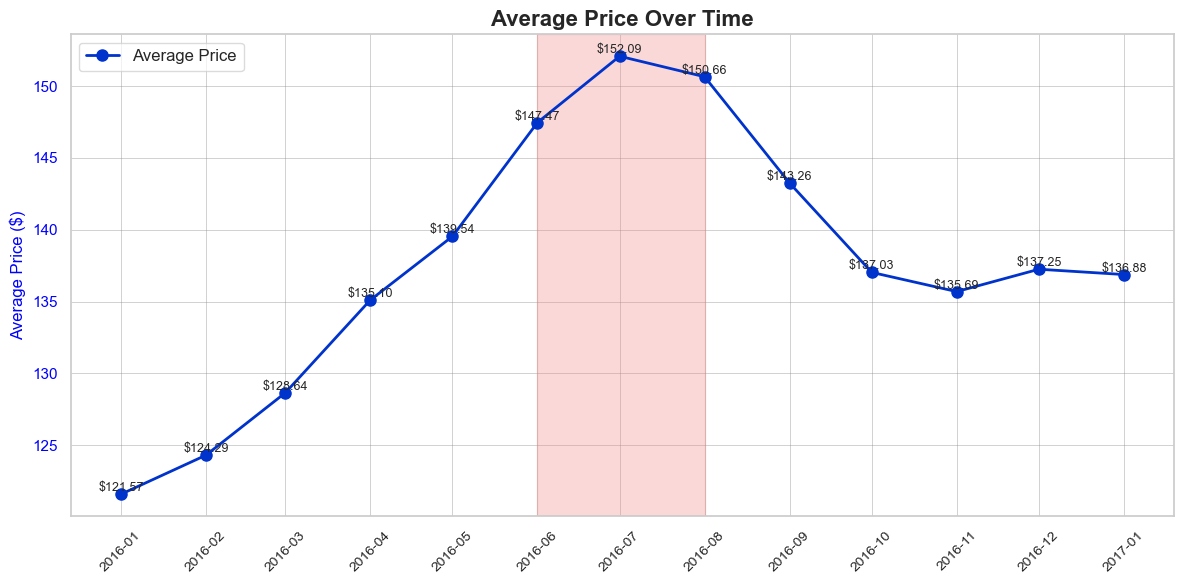

In [211]:
# Plotting the nightly average price data across time-series from dfc "grouped".

# Set the style using seaborn
sns.set(style="whitegrid")

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plotting the price as a line with enhancements
ax.plot(grouped['month_year'], 
        grouped['price'], 
        color='#0033cc',  # Darker blue color
        marker='o', 
        markersize=8, 
        linewidth=2, 
        label='Average Price')

# Title and labels
ax.set_title('Average Price Over Time', fontsize=16, fontweight='bold')
ax.set_ylabel('Average Price ($)', color='blue', fontsize=12)
ax.tick_params(axis='y', labelcolor='blue')

# Formatting the x-axis
ax.set_xticks(grouped['month_year'])  # Set x-ticks to be the month_year column
ax.set_xticklabels(grouped['month_year'].dt.strftime('%Y-%m'), rotation=45, fontsize=10)

# Adding a grid with lighter lines
ax.grid(color='gray', linestyle='-', linewidth=0.5, alpha=0.5)

# Highlight the region from June 2016 to August 2016 with pinkish color
highlight = (grouped['month_year'] >= '2016-06') & (grouped['month_year'] <= '2016-08')
ax.axvspan(grouped['month_year'][highlight].min(), 
           grouped['month_year'][highlight].max(), 
           color='lightcoral', alpha=0.3)  # Change to a pinkish color

# Adding annotations for each price point
for i in range(len(grouped)):
    ax.text(grouped['month_year'].iloc[i], 
            grouped['price'].iloc[i], 
            f'${grouped["price"].iloc[i]:.2f}', 
            fontsize=9, 
            ha='center', 
            va='bottom')

# Adding a legend with background
legend = ax.legend(loc='upper left', fontsize=12, framealpha=0.7)
frame = legend.get_frame()
frame.set_facecolor('white')

# Show the plot
plt.tight_layout()
plt.show()


### 2. What are the top 3 listing neighbourhood groups in terms of average nightly price in Seattle?


In [212]:
grouped_neighborhoud_group = ndfl.groupby(['neighbourhood_group']).agg(
    mean_price=('price', 'mean')).reset_index()

# Display the resulting DataFrame
grouped_neighborhoud_group

,neighbourhood_group,mean_price
0,Ballard,124.244541
1,Beacon Hill,94.837607
2,Capitol Hill,130.498214
3,Cascade,140.101124
4,Central Area,128.538043
5,Delridge,83.278481
6,Downtown,154.676923
7,Interbay,111.200000
8,Lake City,92.671642
9,Magnolia,177.672131


In [213]:
grouped_neighborhoud_group.describe()

,mean_price
count,17.000000
mean,119.929720
std,27.813969
min,83.278481
25%,93.639344
50%,119.801517
75%,140.101124
max,177.672131


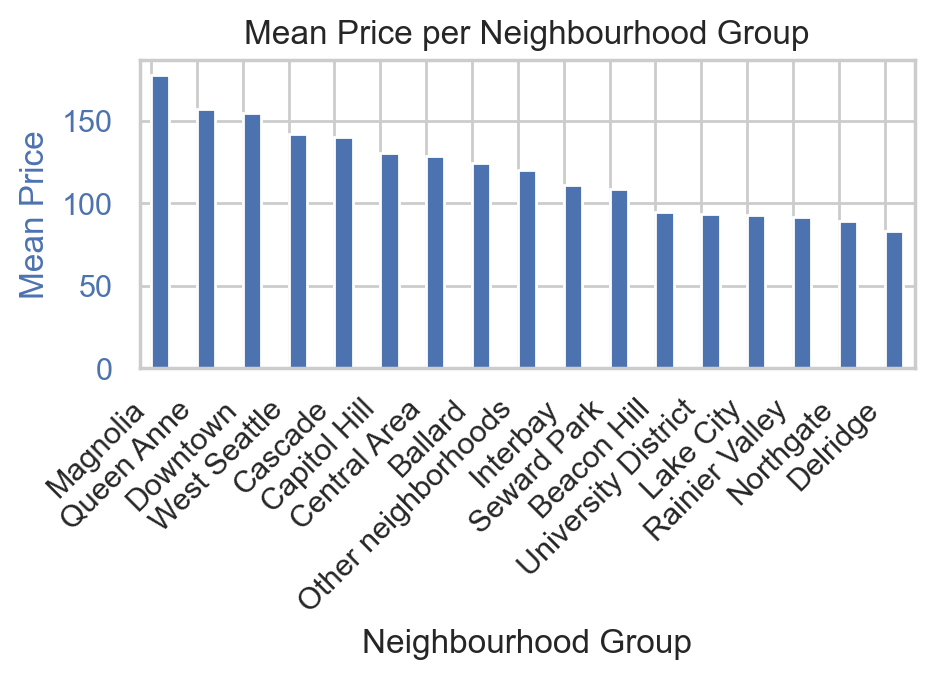

In [214]:
# Sort the DataFrame by mean price in descending order
grouped_neighborhoud_group = grouped_neighborhoud_group.sort_values(by='mean_price', ascending=False)

fig, ax1 = plt.subplots(figsize=(5, 2), dpi=200)


# Plot mean price as bars
grouped_neighborhoud_group['mean_price'].plot(kind='bar', ax=ax1, color='b', position=0, width=0.4, label='Mean Price')
ax1.set_ylabel('Mean Price', color='b')
ax1.tick_params(axis='y', labelcolor='b')




# Show title and labels
def titles(plot_title_str,x_label_str,x_ticks_column):
    plt.title(plot_title_str)
    ax1.set_xlabel(x_label_str)
    ax1.set_xticklabels(x_ticks_column, rotation=45, ha='right')  # Use neighbourhood_group for x-tick labels

titles('Mean Price per Neighbourhood Group','Neighbourhood Group',grouped_neighborhoud_group['neighbourhood_group'])

# Show the plot
plt.show()



### 3. What factors are most correlated with predicting the listing nightly price?

In [215]:
ndfl.columns

Index(['id', 'host_is_superhost', 'neighbourhood', 'neighbourhood_group',
       'zipcode', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'bed_type', 'price', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'amenities_Cable TV',
       'amenities_Elevator in Building', 'amenities_Washer',
       'amenities_Indoor Fireplace', 'amenities_Heating',
       'amenities_Pets Allowed', 'amenities_First Aid Kit',
       'amenities_Laptop Friendly Workspace', 'amenities_Kitchen',
       'amenities_Washer / Dryer', 'amenities_24-Hour Check-in',
       'amenities_Breakfast', 'amenities_Essentials', 'amenities_Cat(s)',
       'amenities_TV', 'amenities_Smoke Detector',
       'amenities_Free Parking on Premises', 'amenities_Hot Tub',
       'amenities_Smoking Allowed', 'ameniti

In [216]:
ndfl = pd.get_dummies(ndfl, columns=['neighbourhood', 'neighbourhood_group', 'zipcode', 'property_type', 'room_type', 'bed_type'], drop_first=True)


In [217]:
print(ndfl.columns)

Index(['id', 'host_is_superhost', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'price', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy',
       ...
       'property_type_Tent', 'property_type_Townhouse',
       'property_type_Treehouse', 'property_type_Yurt',
       'room_type_Private room', 'room_type_Shared room', 'bed_type_Couch',
       'bed_type_Futon', 'bed_type_Pull-out Sofa', 'bed_type_Real Bed'],
      dtype='object', length=206)


In [218]:
features = ndfl.drop(columns=['price'])

# Define labels as the 'price' column
labels = ndfl['price']


In [219]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)


In [220]:
scaler = StandardScaler()

# Fit and transform the training data, transform the test data
features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)


In [221]:
model = LinearRegression()

In [222]:
model.fit(features_train,labels_train)

LinearRegression()

In [223]:
labels_predict = model.predict(features_test)

In [224]:
print('Mean Squared Error:', mean_squared_error(labels_test, labels_predict))

print('R^2 Score:', r2_score(labels_test, labels_predict))


Mean Squared Error: 8.439914218588205e+22
R^2 Score: -1.143722105474119e+19


In [225]:
print(ndfl.isnull().sum())


id                                         0
host_is_superhost                          0
accommodates                               0
bathrooms                                  0
bedrooms                                   0
beds                                       0
price                                      0
number_of_reviews                          0
review_scores_rating                       0
review_scores_accuracy                     0
review_scores_cleanliness                  0
review_scores_checkin                      0
review_scores_communication                0
review_scores_location                     0
review_scores_value                        0
amenities_Cable TV                         0
amenities_Elevator in Building             0
amenities_Washer                           0
amenities_Indoor Fireplace                 0
amenities_Heating                          0
amenities_Pets Allowed                     0
amenities_First Aid Kit                    0
amenities_

In [226]:
print(features_train.shape)
print(features_test.shape)
print(labels_train.shape)
print(labels_test.shape)

(3028, 205)
(758, 205)
(3028,)
(758,)


In [227]:
lasso_model = Lasso(alpha=0.1)  # Change alpha to adjust regularization
lasso_model.fit(features_train, labels_train)

# Step 4: Make predictions
labels_predict = lasso_model.predict(features_test)

# Step 5: Evaluate the model
print('Mean Squared Error:', mean_squared_error(labels_test, labels_predict))
print('R^2 Score:', r2_score(labels_test, labels_predict))

# Optional: Check the coefficients
print('Coefficients:', lasso_model.coef_)


Mean Squared Error: 2976.2767913554485
R^2 Score: 0.5966743890849376
Coefficients: [-2.29575030e+00  1.58823497e+00  1.67646429e+01  1.36915267e+01
  2.74293314e+01  4.52601625e+00 -6.82798357e+00  2.15433940e+00
  2.41572256e+00  3.08231986e+00  4.43942726e-01  5.26916241e-01
  1.01204290e+00 -5.83835230e+00  5.06023231e-01  3.64524226e+00
 -8.59608082e-01  3.51321606e+00 -1.62575225e+00 -4.29333684e-01
  2.93304732e+00  3.07156443e-01 -7.67602665e-02 -2.44604434e-01
 -1.94455566e+00 -0.00000000e+00 -2.34170945e+00 -0.00000000e+00
  2.26072766e-02 -0.00000000e+00 -9.24904010e-02  4.46132994e+00
 -1.11547757e+00 -0.00000000e+00  2.00205743e+00 -2.79129735e+00
  6.33630123e-01  3.62682262e-01 -1.66118956e+00  1.31146698e+00
 -0.00000000e+00 -4.05167053e+00 -7.34431905e-01  7.50344726e-02
 -1.76743983e+00 -3.17791628e-01  2.52703530e+00  5.55093944e-01
  5.18427656e+00  6.80772808e-01  5.54755127e-01 -4.97615241e-01
  3.19028832e-01 -1.66452721e+00  1.25193293e+00  1.93805064e+00
 -4.991

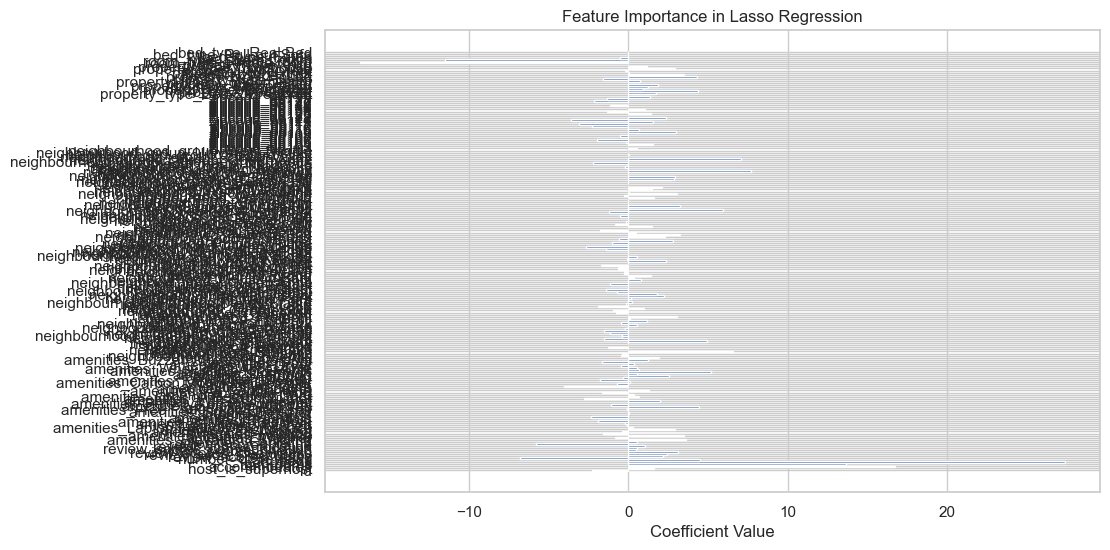

In [228]:
# Plotting the coefficients
plt.figure(figsize=(10, 6))
plt.barh(np.arange(len(lasso_model.coef_)), lasso_model.coef_, align='center')
plt.yticks(np.arange(len(lasso_model.coef_)), features.columns)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Lasso Regression')
plt.show()


In [229]:

param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # You can adjust these values
}

# Step 4: Initialize the Lasso model and GridSearchCV
lasso_model = Lasso()
grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Step 5: Fit the GridSearchCV object
grid_search.fit(features_train, labels_train)

# Step 6: Get the best model and parameters
best_lasso = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best parameters found: ", best_params)

# Step 7: Make predictions with the best model
labels_predict = best_lasso.predict(features_test)

# Step 8: Evaluate the best model
print('Mean Squared Error:', mean_squared_error(labels_test, labels_predict))
print('R^2 Score:', r2_score(labels_test, labels_predict))

# Optional: Check the coefficients of the best model
coefficients = best_lasso.coef_
print('Coefficients:', coefficients)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.689e+04, tolerance: 2.025e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.468e+04, tolerance: 2.080e+03
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:678: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.834e+04, toler

Best parameters found:  {'alpha': 1}
Mean Squared Error: 3004.545094708095
R^2 Score: 0.592843653061879
Coefficients: [-7.87143333e-01  1.00590584e+00  1.69712027e+01  1.39907197e+01
  2.74701950e+01  4.05289961e+00 -4.51680939e+00  1.48434601e+00
  1.51693816e+00  1.71871315e+00  0.00000000e+00  0.00000000e+00
  1.10064564e+00 -2.72897703e+00  1.48307949e-01  2.72782841e+00
 -3.86748327e-01  2.87905364e+00 -4.95621290e-01 -0.00000000e+00
  1.26172081e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -1.21197248e+00 -0.00000000e+00 -1.35681954e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  2.53475013e+00
 -2.58029488e-01  0.00000000e+00  4.12362287e-01 -1.31005757e+00
  0.00000000e+00  0.00000000e+00 -1.06054277e+00  8.14791712e-01
  0.00000000e+00 -3.26240340e+00  0.00000000e+00 -0.00000000e+00
 -1.32436619e-01 -0.00000000e+00  1.03782482e+00  0.00000000e+00
  4.51556786e+00  0.00000000e+00  0.00000000e+00 -1.18069799e-02
 -0.00000000e+00 -0.00000000e+00  4.6

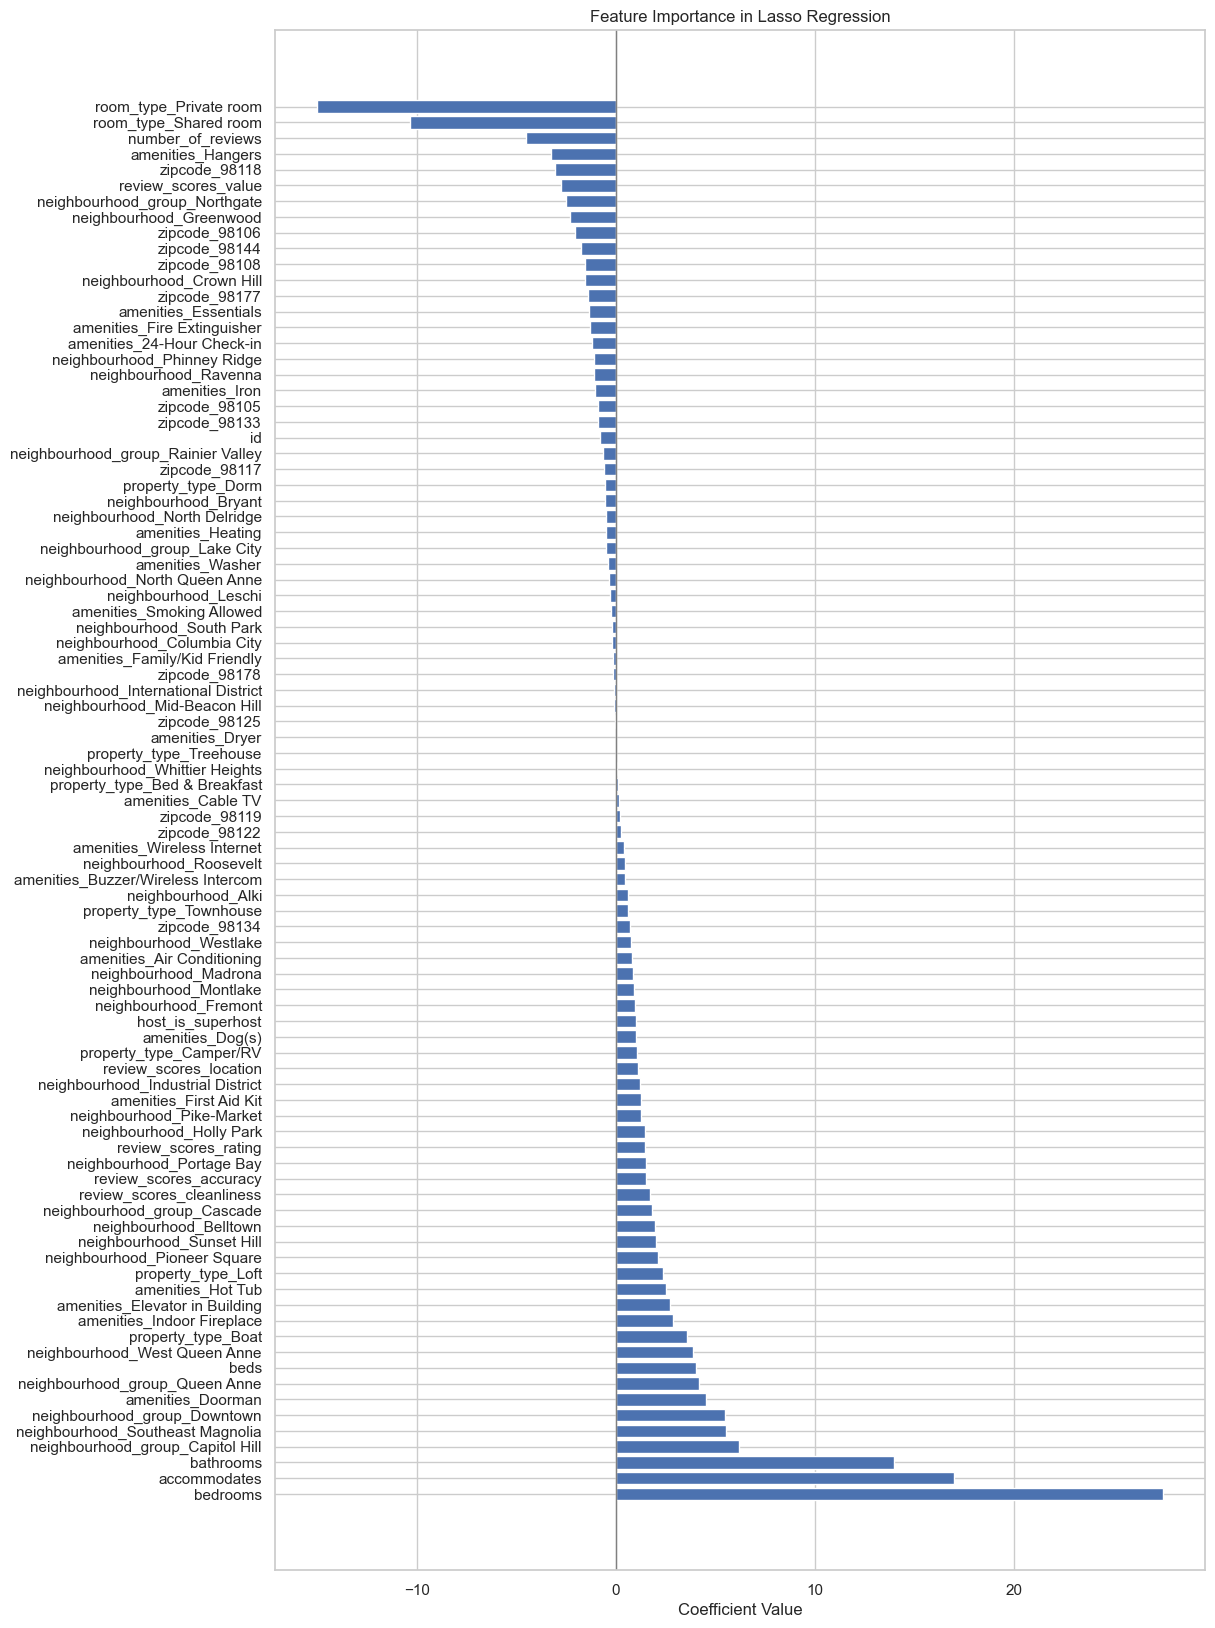

In [230]:
# Create a DataFrame for feature names and their coefficients
coef_df = pd.DataFrame({'Feature': features.columns, 'Coefficient': coefficients})
coef_df = coef_df[coef_df['Coefficient'] != 0].sort_values(by='Coefficient', ascending=False)

# Plot the coefficients
plt.figure(figsize=(12, 20))
plt.barh(coef_df['Feature'], coef_df['Coefficient'], align='center')
plt.xlabel('Coefficient Value')
plt.title('Feature Importance in Lasso Regression')
plt.axvline(0, color='grey', lw=1)  # Add a vertical line at 0 for reference
plt.show()

In [232]:
# Assuming you know which features were one-hot encoded
one_hot_features = ['neighbourhood', 'neighbourhood_group', 'zipcode', 'property_type', 'room_type', 'bed_type','amenities'] # Add your one-hot encoded feature names here

# Initialize the dictionary to store consolidated coefficients
consolidated_coefficients = {}


for feature in one_hot_features:
    # Get the columns corresponding to the one-hot encoded feature
    encoded_columns = coef_df['Feature'].str.contains(feature)  # This assumes you have retained the prefix in the encoded column names
    # Sum the coefficients for those columns
    consolidated_coefficients[feature] = coef_df.loc[encoded_columns, 'Coefficient'].sum()

# Convert the consolidated coefficients to a DataFrame
consolidated_df = pd.DataFrame.from_dict(consolidated_coefficients, orient='index', columns=['Coefficient'])

consolidated_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7 entries, neighbourhood to amenities
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Coefficient  7 non-null      float64
dtypes: float64(1)
memory usage: 112.0+ bytes


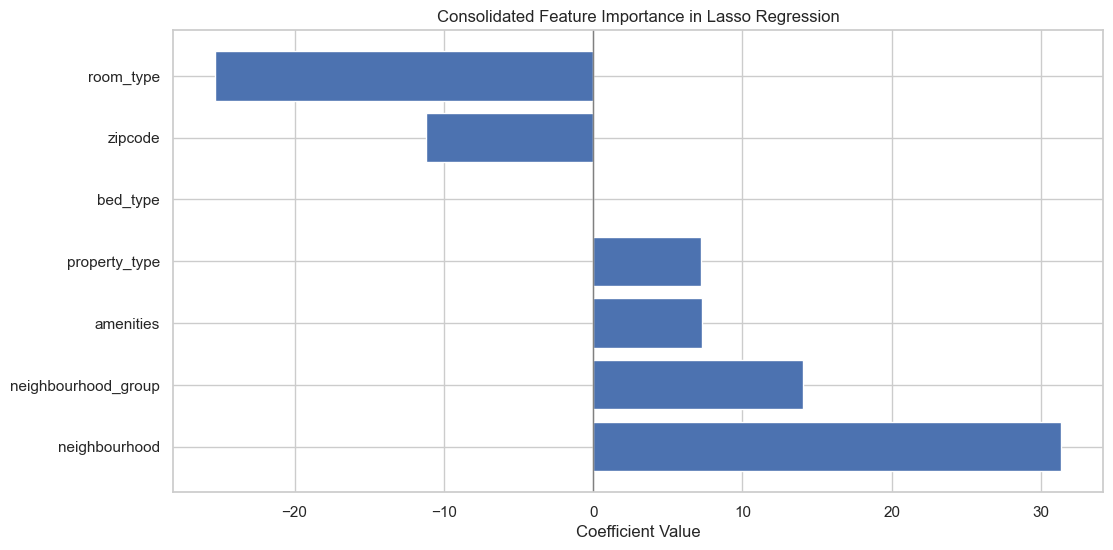

                     Coefficient
neighbourhood          31.323770
neighbourhood_group    14.036580
amenities               7.314170
property_type           7.212202
bed_type                0.000000
zipcode               -11.170633
room_type             -25.304218


In [233]:

# Optional: Sort and plot
consolidated_df = consolidated_df.sort_values(by='Coefficient', ascending=False)

# Plot the consolidated coefficients
plt.figure(figsize=(12, 6))
plt.barh(consolidated_df.index, consolidated_df['Coefficient'], align='center')
plt.xlabel('Coefficient Value')
plt.title('Consolidated Feature Importance in Lasso Regression')
plt.axvline(0, color='grey', lw=1)  # Add a vertical line at 0 for reference
plt.show()

# Print the consolidated coefficients for analysis
print(consolidated_df)


# NOTES: look into VIF's and Multicollinearity - rerun gridsearch - K-Fold CV - Manual feature exclusions, others from sketch